# Import necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import sklearn.datasets as data
import csv

#HDBSCAN

import hdbscan

# Import the data and visualise it 

In [2]:
df = pd.read_csv("tsne-reduced.csv")
print("Shape od data= ", df.shape)
df.head()

Shape od data=  (211, 3)


,ID,0,1
0,one_42.jpg-1.jpg-1.jpg,-11.428161,-0.324799
1,20201116-131916IMG_1335-1.jpg,4.993661,-0.444068
2,20201116-132319IMG_1387-1.jpg,12.597679,2.612981
3,20201116-121847IMG_9587-1.jpg,12.962786,-4.636863
4,20201116-143348_DSC0072-1.jpg,-3.517240,-0.069127


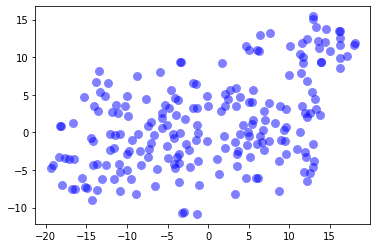

In [3]:
# Visualise the data 
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

plt.scatter(df['0'], df['1'], color='b', **plot_kwds)

# testing hdbscan 

In [4]:
db_test= pd.read_csv('tsne-reduced.csv', usecols = ['0', '1'])
db_test.head()
data = np.array(db_test)

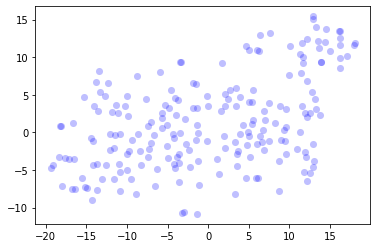

In [5]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)


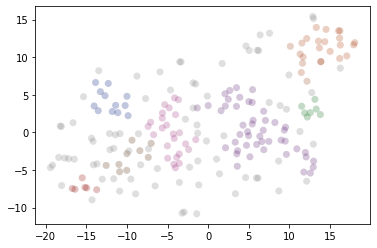

In [63]:

clusterer = hdbscan.HDBSCAN(min_cluster_size=6,min_samples=4).fit(data)
color_palette = sns.color_palette('dark', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

# see how the clusters look like in Tree format

In [22]:
clusterer.condensed_tree_


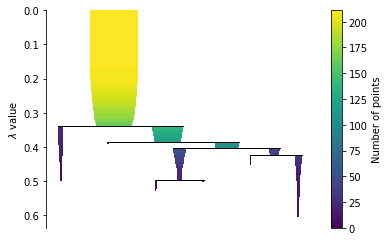

In [23]:
clusterer.condensed_tree_.plot()


In [24]:
clusterer.condensed_tree_.to_numpy()


array([(211, 101, 0.16443966,   1), (211, 172, 0.1663769 ,   1),
       (211,  19, 0.16705015,   1), (211,  76, 0.20614417,   1),
       (211, 155, 0.20717631,   1), (211, 191, 0.21153953,   1),
       (211,  24, 0.21390119,   1), (211, 192, 0.22034748,   1),
       (211,  47, 0.22379547,   1), (211, 146, 0.22391209,   1),
       (211,  53, 0.22853189,   1), (211, 126, 0.23477895,   1),
       (211,  83, 0.2431394 ,   1), (211, 121, 0.24893344,   1),
       (211,  82, 0.25220697,   1), (211,  25, 0.25355701,   1),
       (211, 163, 0.26613977,   1), (211,  48, 0.26684849,   1),
       (211,  42, 0.26723461,   1), (211,  57, 0.26752303,   1),
       (211, 175, 0.27181001,   1), (211, 142, 0.27264685,   1),
       (211, 168, 0.27374536,   1), (211,  59, 0.28142442,   1),
       (211, 115, 0.28337656,   1), (211, 127, 0.28631909,   1),
       (211, 188, 0.28743416,   1), (211,  64, 0.29362774,   1),
       (211,  51, 0.29395009,   1), (211, 138, 0.29476454,   1),
       (211, 206, 0.29650

In [25]:
clusterer.labels_


array([-1,  4,  3,  4,  2, -1,  2,  3, -1,  4,  4,  2,  0,  4, -1,  0, -1,
        4,  3, -1,  2,  0, -1,  2, -1, -1,  0,  2,  0,  0, -1,  0, -1,  1,
       -1,  4,  1,  2, -1,  4,  1, -1, -1, -1, -1,  4,  4, -1, -1,  4,  2,
       -1,  2, -1,  2,  2, -1, -1, -1, -1,  2,  1, -1,  4, -1,  2,  2, -1,
        2,  2, -1, -1,  2, -1, -1,  4, -1, -1, -1,  2,  4,  2, -1, -1,  2,
        2, -1, -1,  2, -1,  0, -1, -1,  2, -1, -1,  2, -1,  2,  2,  3, -1,
        2, -1, -1,  2, -1,  1,  0, -1,  0,  3, -1, -1,  4, -1,  2,  2,  2,
        3,  2, -1,  2,  2,  1,  4, -1, -1,  2, -1,  2, -1,  4,  1, -1,  2,
        4,  0, -1,  0,  4, -1, -1,  0,  4,  0, -1, -1, -1,  2, -1, -1,  4,
        2,  2, -1,  2,  2, -1, -1,  2,  2, -1, -1,  0,  4,  0,  3, -1,  4,
        2,  2, -1,  4, -1, -1,  2, -1, -1,  4,  2,  4,  0, -1,  4, -1, -1,
       -1, -1,  2,  4, -1, -1,  4,  0,  0,  0,  0,  4,  4,  2,  2, -1, -1,
       -1,  0, -1,  2,  2,  2,  4])

In [26]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3,  4])

# test new cluster size 

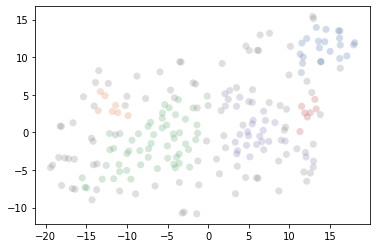

In [65]:
# good set of values 6,6
clusterer = hdbscan.HDBSCAN(min_cluster_size=6,min_samples=6).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [66]:
clusterer.labels_

array([-1,  4,  3,  4,  2, -1,  2,  3, -1,  4,  4,  2,  0,  4, -1,  0, -1,
        4,  3, -1,  2,  0, -1,  2, -1, -1,  0,  2,  0,  0, -1,  0, -1,  1,
       -1,  4,  1,  2, -1,  4,  1, -1, -1, -1, -1,  4,  4, -1, -1,  4,  2,
       -1,  2, -1,  2,  2, -1, -1, -1, -1,  2,  1, -1,  4, -1,  2,  2, -1,
        2,  2, -1, -1,  2, -1, -1,  4, -1, -1, -1,  2,  4,  2, -1, -1,  2,
        2, -1, -1,  2, -1,  0, -1, -1,  2, -1, -1,  2, -1,  2,  2,  3, -1,
        2, -1, -1,  2, -1,  1,  0, -1,  0,  3, -1, -1,  4, -1,  2,  2,  2,
        3,  2, -1,  2,  2,  1,  4, -1, -1,  2, -1,  2, -1,  4,  1, -1,  2,
        4,  0, -1,  0,  4, -1, -1,  0,  4,  0, -1, -1, -1,  2, -1, -1,  4,
        2,  2, -1,  2,  2, -1, -1,  2,  2, -1, -1,  0,  4,  0,  3, -1,  4,
        2,  2, -1,  4, -1, -1,  2, -1, -1,  4,  2,  4,  0, -1,  4, -1, -1,
       -1, -1,  2,  4, -1, -1,  4,  0,  0,  0,  0,  4,  4,  2,  2, -1, -1,
       -1,  0, -1,  2,  2,  2,  4])

In [67]:
print('the number of uniqe clusters:',np.unique(clusterer.labels_))
print('the length of cluster prediction: ',len (clusterer.labels_))

the number of uniqe clusters: [-1  0  1  2  3  4]
the length of cluster prediction:  211


# Move files according to clusters 

In [68]:
import os
import shutil
import csv
import sys
import pandas as pd
current = os.getcwd()

# os.mkdir('./HDBSCAN_clusters')

In [69]:
col_list = ["ID"]
image_data_list = pd.read_csv('tsne-reduced.csv', usecols=col_list)
print('the length of image list: ',len(image_data_list))
image_data_list.head()

the length of image list:  211


,ID
0,one_42.jpg-1.jpg-1.jpg
1,20201116-131916IMG_1335-1.jpg
2,20201116-132319IMG_1387-1.jpg
3,20201116-121847IMG_9587-1.jpg
4,20201116-143348_DSC0072-1.jpg


In [71]:
current = os.getcwd()
for clusters in np.unique(clusterer.labels_):
    folder = str(clusters)
    os.mkdir('./HDBSCAN_clusters/'+folder)
#     print('./HDBSCAN_clusters/'+folder)

source = image_data_list.values.tolist()
destintaion= clusterer.labels_.tolist()
print('type source:',type(source),"type destintaion: ",type(destintaion))
destintaion_path = './HDBSCAN_clusters/'

# moving files to clusters 

for i in range(len(source)):
    s = './images/'+str(source[i][0])
    d = './HDBSCAN_clusters/'+str(destintaion[i])
    print(s , ' -> ' ,d)
    shutil.copy(s,d)



type source: <class 'list'> type destintaion:  <class 'list'>
./images/one_42.jpg-1.jpg-1.jpg  ->  ./HDBSCAN_clusters/-1
./images/20201116-131916IMG_1335-1.jpg  ->  ./HDBSCAN_clusters/4
./images/20201116-132319IMG_1387-1.jpg  ->  ./HDBSCAN_clusters/3
./images/20201116-121847IMG_9587-1.jpg  ->  ./HDBSCAN_clusters/4
./images/20201116-143348_DSC0072-1.jpg  ->  ./HDBSCAN_clusters/2
./images/20201116-142800IMG_9078-1.jpg  ->  ./HDBSCAN_clusters/-1
./images/one_43.jpg-1.jpg-1.jpg  ->  ./HDBSCAN_clusters/2
./images/20201116-132431IMG_1435-1.jpg  ->  ./HDBSCAN_clusters/3
./images/20201116-131927__DSC058-1.jpg  ->  ./HDBSCAN_clusters/-1
./images/20201116-131927IMG_8274-1.jpg  ->  ./HDBSCAN_clusters/4
./images/20201116-131338IMG_1129-1.jpg  ->  ./HDBSCAN_clusters/4
./images/20201116-142738IMG_9055-1.jpg  ->  ./HDBSCAN_clusters/2
./images/one_3.jpg-1.jpg-1.jpg  ->  ./HDBSCAN_clusters/0
./images/20201116-131925IMG_1349-1.jpg  ->  ./HDBSCAN_clusters/4
./images/one_33.jpg-1.jpg-1.jpg  ->  ./HDBSCAN_

# HDB SCAN module testing 

In [14]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(1000)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(data)


AttributeError: module 'hdbscan' has no attribute 'HDBSCAN'